## MFE 412 Trading Strategy

In [1]:
import yfinance as yf
import os
import pandas as pd
import numpy as np
import datetime
import requests
import matplotlib.pyplot as plt

## Data Loading & Cleaning

In [2]:
data = pd.read_excel("BBGData/Trading_strat_macro_data.xlsx", sheet_name="Static")

In [3]:
data.head()

,Date1,SPXT Index,Date2,SP5T1T Index,Date3,SPS2EUN Index,Date4,USGG10YR Index,Date5,USGG2YR Index,...,Date9,GTII10 @BGN Govt,Date10,LBUSTRUU Index,Date11,VIX Index,Date12,OPCVTPCR Index,Date13,CONSSENT Index
0,2025-01-31,13271.38,2025-01-31,9761.66,2025-01-31,1367.14,2025-01-31,4.5387,2025-01-31,4.1971,...,2025-01-31,2.111,2025-01-31,2200.64,2025-01-31,16.43,2025-01-31,0.708,2025-01-31,71.7
1,2025-01-30,13337.85,2025-01-30,9794.33,2025-01-30,1379.12,2025-01-30,4.5163,2025-01-30,4.2073,...,2025-01-30,2.129,2025-01-30,2204.09,2025-01-30,15.84,2025-01-30,0.640,2024-12-31,74.0
2,2025-01-29,13267.65,2025-01-29,9835.83,2025-01-29,1365.35,2025-01-29,4.5284,2025-01-29,4.2135,...,2025-01-29,2.120,2025-01-29,2200.94,2025-01-29,16.56,2025-01-29,0.652,2024-11-30,71.8
3,2025-01-28,13329.95,2025-01-28,9919.98,2025-01-28,1371.81,2025-01-28,4.5323,2025-01-28,4.1949,...,2025-01-28,2.122,2025-01-28,2202.52,2025-01-28,16.41,2025-01-28,0.592,2024-10-31,70.5
4,2025-01-27,13208.19,2025-01-27,9613.16,2025-01-27,1380.82,2025-01-27,4.5343,2025-01-27,4.1950,...,2025-01-27,2.134,2025-01-27,2202.75,2025-01-27,17.90,2025-01-27,0.750,2024-09-30,70.1


In [4]:
spx = data[["Date1", "SPXT Index"]].copy()
#spx[spx["Date1"] == "12/31/1997"]
spx.dropna(subset=["SPXT Index"], inplace=True)
spx = spx.set_index("Date1").rename_axis("Date")
spx = spx.sort_index()
spx["SPX return"] = spx["SPXT Index"].pct_change()
spx.dropna(subset=["SPX return"], inplace=True)


spx10 = data[["Date2", "SP5T1T Index"]].copy()
spx10.dropna(subset=["SP5T1T Index"], inplace=True)
spx10 = spx10.set_index("Date2").rename_axis("Date")
spx10 = spx10.sort_index()
spx10["SPX10 return"] = spx10["SP5T1T Index"].pct_change()
spx10.dropna(subset=["SPX10 return"], inplace=True)

spxsm = data[["Date3", "SPS2EUN Index"]].copy()
spxsm.dropna(subset=["SPS2EUN Index"], inplace=True)
spxsm = spxsm.set_index("Date3").rename_axis("Date")

spxxtech = data[["Date6", "SPXXTSUP Index"]].copy()
spxxtech.dropna(subset=["SPXXTSUP Index"], inplace=True)
spxxtech = spxxtech.set_index("Date6").rename_axis("Date")

BT500ex7 = data[["Date8", "B500XM7T Index"]].copy()
BT500ex7.dropna(subset=["B500XM7T Index"], inplace=True)
BT500ex7 = BT500ex7.set_index("Date8").rename_axis("Date")

Mag7 = data[["Date7", "BM7T Index"]].copy()
Mag7.dropna(subset=["BM7T Index"], inplace=True)
Mag7 = Mag7.set_index("Date7").rename_axis("Date")

vix = data[["Date11", "VIX Index"]].copy()
vix.dropna(subset=["VIX Index"], inplace=True)
vix = vix.set_index("Date11").rename_axis("Date")

putcall = data[["Date12", "OPCVTPCR Index"]].copy()
putcall.dropna(subset=["OPCVTPCR Index"], inplace=True)
putcall = putcall.set_index("Date12").rename_axis("Date")


consent = data[["Date13", "CONSSENT Index"]].copy()
consent.dropna(subset=["CONSSENT Index"], inplace=True)
consent = consent.set_index("Date13").rename_axis("Date")

ylds = data[["Date4", "USGG2YR Index", "USGG10YR Index"]].copy()
ylds.dropna(subset=["USGG10YR Index", "USGG2YR Index"], inplace=True)
ylds = ylds.set_index("Date4").rename_axis("Date")
ylds = ylds.sort_index()
#ylds['10yr change'] = ylds["USGG10YR Index"].diff()
#ylds['2yr change'] = ylds["USGG2YR Index"].diff()

tips = data[["Date9", "GTII10 @BGN Govt"]].copy()
tips.dropna(subset=["GTII10 @BGN Govt"], inplace=True)
tips = tips.set_index("Date9").rename_axis("Date")

infl = pd.concat([ylds, tips], axis=1, join="inner")
infl['exp infl'] = infl["USGG10YR Index"] - infl["GTII10 @BGN Govt"] 


for df in [spx, spx10, vix, putcall, consent, infl]:
    df.index = pd.to_datetime(df.index)



In [45]:
for df_name, df in zip(["spx", "spx10", "vix", "putcall", "consent", "infl"], [spx, spx10, vix, putcall, consent, infl]):
    print(f"{df_name} index dtype: {df.index.dtype}")

spx index dtype: datetime64[ns]
spx10 index dtype: datetime64[ns]
vix index dtype: datetime64[ns]
putcall index dtype: datetime64[ns]
consent index dtype: datetime64[ns]
infl index dtype: datetime64[ns]


In [47]:
print("spxxtech:", spxxtech.index.min(), "to", spxxtech.index.max())
print("spx:", spx.index.min(), "to", spx.index.max())
print("spx10:", spx10.index.min(), "to", spx10.index.max())
print("vix:", vix.index.min(), "to", vix.index.max())
print("putcall:", putcall.index.min(), "to", putcall.index.max())
print("consent:", consent.index.min(), "to", consent.index.max())
print("infl:", infl.index.min(), "to", infl.index.max())

spxxtech: 1999-12-17 00:00:00 to 2025-01-31 00:00:00
spx: 1998-01-02 00:00:00 to 2025-01-31 00:00:00
spx10: 2005-07-01 00:00:00 to 2025-01-31 00:00:00
vix: 1997-12-31 00:00:00 to 2025-01-31 00:00:00
putcall: 1997-12-31 00:00:00 to 2025-01-31 00:00:00
consent: 1997-12-31 00:00:00 to 2025-01-31 00:00:00
infl: 1997-12-31 00:00:00 to 2025-01-31 00:00:00


In [5]:
macrodf = (
    spx
    .join(spx10, how="inner")
    .join(vix, how="inner")
    .join(putcall, how="inner")
    .join(infl, how="inner")  # 'infl' already has 'ylds' and 'tips' merged
    .join(consent, how="left")
)

macrodf.ffill(inplace=True)
macrodf = macrodf.iloc[42:]
macrodf

,SPXT Index,SPX return,SP5T1T Index,SPX10 return,VIX Index,OPCVTPCR Index,USGG2YR Index,USGG10YR Index,GTII10 @BGN Govt,exp infl,CONSSENT Index
Date,,,,,,,,,,,
2005-08-31,1834.48,0.010193,994.32,0.010149,12.60,0.824,3.8114,4.0137,1.643,2.3707,89.1
2005-09-01,1836.37,0.001030,994.27,-0.000050,13.15,0.744,3.7211,4.0307,1.585,2.4457,89.1
2005-09-02,1831.06,-0.002892,990.80,-0.003490,13.57,0.890,3.7522,4.0362,1.576,2.4602,89.1
2005-09-06,1854.23,0.012654,1003.02,0.012333,12.93,0.821,3.8010,4.0953,1.647,2.4483,89.1
2005-09-07,1859.00,0.002572,1007.05,0.004018,12.52,0.736,3.8423,4.1375,1.685,2.4525,89.1
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-27,13208.19,-0.014572,9613.16,-0.039951,17.90,0.750,4.1950,4.5343,2.134,2.4003,74.0
2025-01-28,13329.95,0.009219,9919.98,0.031917,16.41,0.592,4.1949,4.5323,2.122,2.4103,74.0
2025-01-29,13267.65,-0.004674,9835.83,-0.008483,16.56,0.652,4.2135,4.5284,2.120,2.4084,74.0


In [72]:
ffactors = pd.read_csv("BBGData/ff_5factors.csv", skiprows=2)
ffactors.rename(columns={ffactors.columns[0]: "Date"}, inplace=True)

# Convert "Date" to datetime format
ffactors["Date"] = pd.to_datetime(ffactors["Date"], format="%Y%m%d")

# Set "Date" as the index
ffactors.set_index("Date", inplace=True)

In [73]:
ffactors

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-07-01,-0.67,0.02,-0.35,0.03,0.13,0.012
1963-07-02,0.79,-0.28,0.28,-0.08,-0.21,0.012
1963-07-03,0.63,-0.18,-0.10,0.13,-0.25,0.012
1963-07-05,0.40,0.09,-0.28,0.07,-0.30,0.012
1963-07-08,-0.63,0.07,-0.20,-0.27,0.06,0.012
...,...,...,...,...,...,...
2024-12-24,1.11,-0.12,-0.05,-0.13,-0.37,0.017
2024-12-26,0.02,1.09,-0.19,-0.44,0.35,0.017
2024-12-27,-1.17,-0.44,0.56,0.41,0.03,0.017


In [74]:
total_df = macrodf.join(ffactors, how="inner")


In [76]:
total_df.to_csv("BBGData/trading_strategy_all_data.csv")

## Macro Data Plots

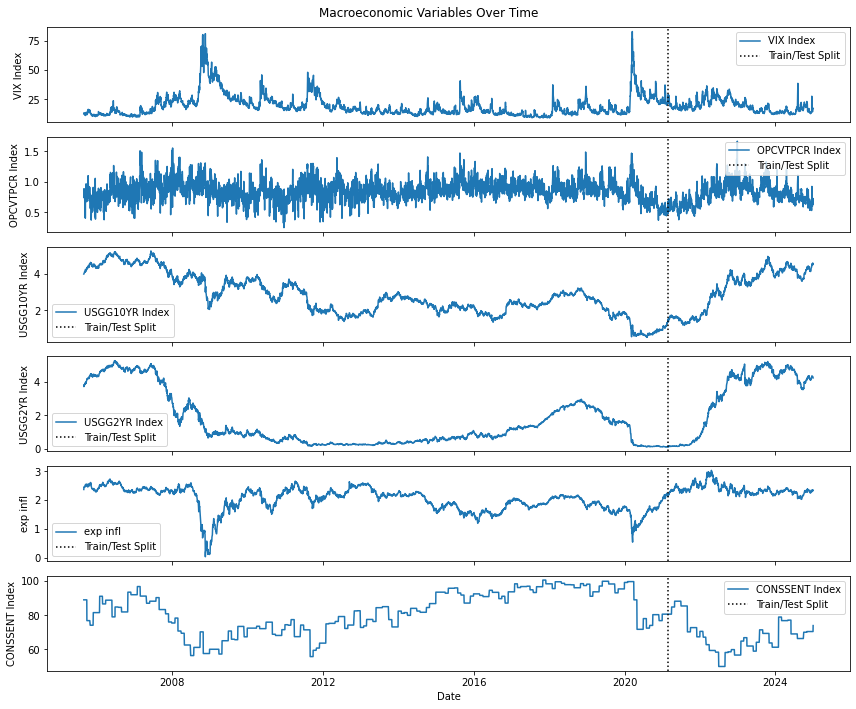

In [6]:
# Re-load the dataset after execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "BBGData/trading_strategy_all_data.csv"
df = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")

# List of macroeconomic variables used in the strategy
macro_vars = ["VIX Index", "OPCVTPCR Index", "USGG10YR Index", "USGG2YR Index", "exp infl", "CONSSENT Index"]

# Split the dataset into training and testing sets
split_index = int(len(df) * 0.8)
train_df = df.iloc[:split_index].copy()
test_df = df.iloc[split_index:].copy()

# Get the index for the split between training and testing periods
split_date = test_df.index[0]

# Plot each macroeconomic variable
fig, axes = plt.subplots(len(macro_vars), 1, figsize=(12, 10), sharex=True)
for i, var in enumerate(macro_vars):
    if var in df.columns:
        axes[i].plot(df.index, df[var], label=var)
        axes[i].axvline(x=split_date, color="black", linestyle="dotted", label="Train/Test Split")
        axes[i].legend()
        axes[i].set_ylabel(var)

# Set x-axis label
axes[-1].set_xlabel("Date")
plt.suptitle("Macroeconomic Variables Over Time")
plt.tight_layout()
plt.show()


## Trading Strategy

## ML Gradient Boosting Strategy

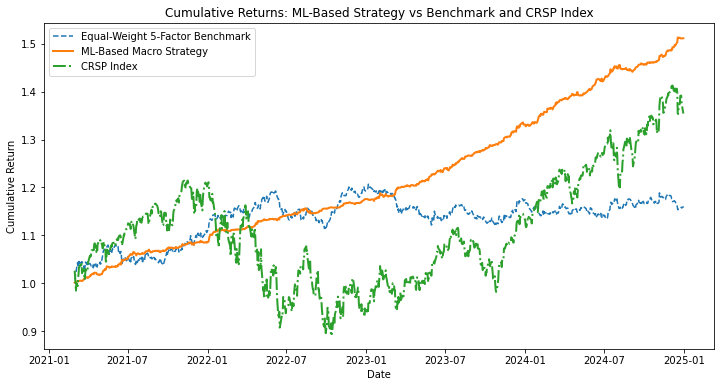

,Metric,Strategy,Benchmark,Market
0,Cumulative Return,0.511583,0.160732,0.354280
1,Annualized Return,0.113679,0.039607,0.082239
2,Volatility,0.021520,0.058780,0.173835
3,Sharpe Ratio,5.277103,0.671822,0.472412
4,Max 1-Day Drawdown,-0.004636,-0.013380,-0.042900


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("BBGData/trading_strategy_all_data.csv", parse_dates=["Date"], index_col="Date")

# Compute the equal-weighted 5-factor benchmark return
df["Benchmark Return"] = ((df["Mkt-RF"] + df["SMB"] + df["HML"] + df["RMW"] + df["CMA"]) / 5) / 100  # Convert from percent

# Compute cumulative returns for the benchmark
df["Benchmark Cumulative"] = (1 + df["Benchmark Return"]).cumprod()

# Compute cumulative returns for the market factor only
df["Market Cumulative"] = (1 + (df["Mkt-RF"] / 100)).cumprod()

# Define lag selection for macroeconomic variables
df["VIX_lag5"] = df["VIX Index"].shift(5)
df["PCR_lag5"] = df["OPCVTPCR Index"].shift(5)
df["YldCurve_lag5"] = (df["USGG10YR Index"] - df["USGG2YR Index"]).shift(5)
df["ExpInfl_lag5"] = df["exp infl"].shift(5)
df["ConsSent_lag5"] = df["CONSSENT Index"].shift(15)

# Factor momentum - 20-day rolling average return for smoother adjustments
factors = ["Mkt-RF", "SMB", "HML", "RMW", "CMA"]
for factor in factors:
    df[f"{factor}_mom20"] = df[factor].rolling(window=20).mean()

# Drop NaNs caused by lagging
df.dropna(inplace=True)

# Split into training and testing sets
split_index = int(len(df) * 0.8)
train_df = df.iloc[:split_index].copy()
test_df = df.iloc[split_index:].copy()

# Feature selection
features = ["VIX_lag5", "PCR_lag5", "YldCurve_lag5", "ExpInfl_lag5", "ConsSent_lag5"] + [f"{factor}_mom20" for factor in factors]
target_factors = factors  # Predicting factor returns

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(train_df[features])
X_test = scaler.transform(test_df[features])

# Train ML models for each factor
models = {}
for factor in target_factors:
    y_train = train_df[factor] / 100  # Convert to decimal
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    models[factor] = model

# Predict factor returns in the testing period
factor_predictions = {factor: models[factor].predict(X_test) for factor in target_factors}
predicted_factors_df = pd.DataFrame(factor_predictions, index=test_df.index)

# Apply a risk-aversion adjustment based on VIX levels
test_df["Risk Adjustment"] = 1 / (1 + np.exp((test_df["VIX_lag5"] - test_df["VIX_lag5"].mean()) / test_df["VIX_lag5"].std()))

# Compute dynamic weights based on predictions with leverage control (sum to 0.2 instead of 1)
#weights_df = predicted_factors_df.div(predicted_factors_df.abs().sum(axis=1), axis=0) * 0.5
weights_df = predicted_factors_df.div(predicted_factors_df.abs().sum(axis=1), axis=0) * 0.5 * test_df["Risk Adjustment"].values[:, None]

# Compute strategy returns
test_df["Strategy Return"] = (weights_df * test_df[target_factors].values / 100).sum(axis=1)

# Compute cumulative returns for the strategy
test_df["Strategy Cumulative"] = (1 + test_df["Strategy Return"]).cumprod()
test_df["Benchmark Cumulative"] = (1 + test_df["Benchmark Return"]).cumprod()
test_df["Market Cumulative"] = (1 + (test_df["Mkt-RF"] / 100)).cumprod()

# Compute performance metrics
strategy_cumulative_return = test_df["Strategy Cumulative"].iloc[-1] - 1
benchmark_cumulative_return = test_df["Benchmark Cumulative"].iloc[-1] - 1
market_cumulative_return = test_df["Market Cumulative"].iloc[-1] - 1

strategy_annual_return = (test_df["Strategy Cumulative"].iloc[-1]) ** (252 / len(test_df)) - 1
benchmark_annual_return = (test_df["Benchmark Cumulative"].iloc[-1]) ** (252 / len(test_df)) - 1
market_annual_return = (test_df["Market Cumulative"].iloc[-1]) ** (252 / len(test_df)) - 1

strategy_volatility = test_df["Strategy Return"].std() * np.sqrt(252)
benchmark_volatility = test_df["Benchmark Return"].std() * np.sqrt(252)
market_volatility = (test_df["Mkt-RF"] / 100).std() * np.sqrt(252)

# Compute maximum 1-day drawdown
strategy_max_drawdown = test_df["Strategy Return"].min()
benchmark_max_drawdown = test_df["Benchmark Return"].min()
market_max_drawdown = (test_df["Mkt-RF"] / 100).min()

# Compute risk-free rate
risk_free_rate = test_df["RF"].mean() / 100  # Convert from percent to decimal

# Compute Sharpe Ratios
strategy_sharpe = (strategy_annual_return - risk_free_rate) / strategy_volatility
benchmark_sharpe = (benchmark_annual_return - risk_free_rate) / benchmark_volatility
market_sharpe = (market_annual_return - risk_free_rate) / market_volatility

performance_metrics = pd.DataFrame({
    "Metric": ["Cumulative Return", "Annualized Return", "Volatility", "Sharpe Ratio", "Max 1-Day Drawdown"],
    "Strategy": [strategy_cumulative_return, strategy_annual_return, strategy_volatility, strategy_sharpe, strategy_max_drawdown],
    "Benchmark": [benchmark_cumulative_return, benchmark_annual_return, benchmark_volatility, benchmark_sharpe, benchmark_max_drawdown],
    "Market": [market_cumulative_return, market_annual_return, market_volatility, market_sharpe, market_max_drawdown]
})

# Plot the cumulative returns for the testing period
plt.figure(figsize=(12, 6))
plt.plot(test_df.index, test_df["Benchmark Cumulative"], label="Equal-Weight 5-Factor Benchmark", linestyle="--")
plt.plot(test_df.index, test_df["Strategy Cumulative"], label="ML-Based Macro Strategy", linewidth=2)
plt.plot(test_df.index, test_df["Market Cumulative"], label="CRSP Index", linestyle="-.", linewidth=2)
plt.legend()
plt.title("Cumulative Returns: ML-Based Strategy vs Benchmark and CRSP Index")
plt.ylabel("Cumulative Return")
plt.xlabel("Date")
plt.show()

performance_metrics


In [16]:
test_df["SPX return"]

Date
2021-03-01    0.023815
2021-03-02   -0.008073
2021-03-03   -0.013016
2021-03-04   -0.013242
2021-03-05    0.019539
                ...   
2024-12-24    0.011042
2024-12-26   -0.000325
2024-12-27   -0.010970
2024-12-30   -0.010695
2024-12-31   -0.004196
Name: SPX return, Length: 967, dtype: float64

## Rolling Volatility and Correlation

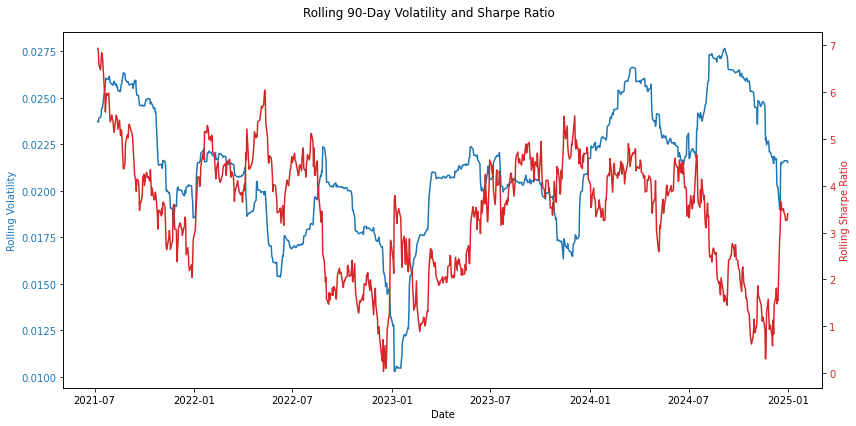

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Compute rolling 90-day volatility and Sharpe ratio
rolling_window = 90

#test_df["Rolling Volatility"] = test_df["Strategy Return"].rolling(window=rolling_window).std() * np.sqrt(252)
#test_df["Rolling Sharpe"] = (test_df["Strategy Return"].rolling(window=rolling_window).mean() / test_df["Rolling Volatility"]) * np.sqrt(252)


test_df["Rolling Volatility"] = test_df["Strategy Return"].rolling(window=rolling_window).std() * np.sqrt(252)

# Compute rolling risk-free rate
rolling_rf = test_df["RF"].rolling(window=rolling_window).mean() / (100)  # Convert from percent to decimal

# Compute rolling Sharpe ratio (ensuring annualization)
test_df["Rolling Sharpe Ratio"] = ((test_df["Strategy Return"].rolling(window=rolling_window).mean() - rolling_rf) 
                                   / test_df["Rolling Volatility"]) * np.sqrt(252)**2


# Plot rolling volatility and Sharpe ratio
fig, ax1 = plt.subplots(figsize=(12, 6))

color = "tab:blue"
ax1.set_xlabel("Date")
ax1.set_ylabel("Rolling Volatility", color=color)
ax1.plot(test_df.index, test_df["Rolling Volatility"], label="Rolling 90-day Volatility", color=color)
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axis that shares the same x-axis
color = "tab:red"
ax2.set_ylabel("Rolling Sharpe Ratio", color=color)
ax2.plot(test_df.index, test_df["Rolling Sharpe Ratio"], label="Rolling 90-day Sharpe Ratio", color=color)
ax2.tick_params(axis="y", labelcolor=color)

fig.suptitle("Rolling 90-Day Volatility and Sharpe Ratio")
fig.tight_layout()
plt.show()


## Beta and Alpha Regression - CRSP Index

In [10]:
import statsmodels.api as sm

# Ensure factors are correctly scaled
factor_columns = ["Mkt-RF", "SMB", "HML", "RMW", "CMA"]
X_factors = sm.add_constant(test_df[factor_columns] / 100)  # Convert factors to decimal scale
Y_strategy = test_df["Strategy Return"]

# Regression of strategy returns on SP500 (Market Factor)
X_market = sm.add_constant(test_df["Mkt-RF"] / 100)  # Convert Mkt-RF to decimal
model_market = sm.OLS(Y_strategy, X_market, missing='drop').fit()
strategy_beta = model_market.params["Mkt-RF"]

# Calculate cumulative performance alpha over the full period
cumulative_strategy_return = (1 + test_df["Strategy Return"]).prod() - 1
cumulative_market_return = (1 + test_df["Mkt-RF"] / 100).prod() - 1
performance_alpha = cumulative_strategy_return - strategy_beta * cumulative_market_return

# Annualize performance alpha
annualized_performance_alpha = performance_alpha * (252 / len(test_df))

# Regression of strategy returns on the full 5-factor model
model_factors = sm.OLS(Y_strategy, X_factors, missing='drop').fit()
strategy_alpha_5f = model_factors.params["const"] * 252  # Annualized alpha from the regression

# Regression of benchmark returns on the 5-factor model
Y_benchmark = test_df["Benchmark Return"]
model_benchmark = sm.OLS(Y_benchmark, X_factors, missing='drop').fit()
benchmark_alpha_5f = model_benchmark.params["const"] * 252  # Annualized alpha from the regression

# Create a performance summary table
performance_summary = pd.DataFrame({
    "Metric": [
        "Portfolio Beta (Market)",
        "Annualized Performance Alpha (Market)",
        "Annualized Alpha (5-Factor Model)",
        "Benchmark Alpha (5-Factor Model)"
    ],
    "Value": [
        strategy_beta,
        annualized_performance_alpha,
        strategy_alpha_5f,
        benchmark_alpha_5f
    ]
})

# Display the performance summary
performance_summary

,Metric,Value
0,Portfolio Beta (Market),4.556053e-03
1,Annualized Performance Alpha (Market),1.328979e-01
2,Annualized Alpha (5-Factor Model),1.066429e-01
3,Benchmark Alpha (5-Factor Model),8.654210e-15


## Beta and Alpha Regression - SPX Index

In [17]:
import statsmodels.api as sm

# Compute excess returns for strategy and SPX
test_df["Excess Strategy Return"] = test_df["Strategy Return"] - (test_df["RF"] / 100)
test_df["Excess SPX Return"] = test_df["SPX return"] - (test_df["RF"] / 100)

# Ensure factors are correctly scaled (convert to decimal)
factor_columns = ["Mkt-RF", "SMB", "HML", "RMW", "CMA"]
X_factors = sm.add_constant(test_df[factor_columns] / 100)  # Convert factors to decimal scale
Y_strategy = test_df["Excess Strategy Return"]

# Regression of strategy returns on SPX Return (Single-Factor Regression)
X_spx = sm.add_constant(test_df["Excess SPX Return"])  # Add constant
model_spx = sm.OLS(Y_strategy, X_spx, missing='drop').fit()
strategy_beta = model_spx.params["Excess SPX Return"]

# Calculate cumulative performance alpha over the full period
cumulative_strategy_return = (1 + test_df["Strategy Return"]).prod() - 1
cumulative_spx_return = (1 + test_df["SPX return"]).prod() - 1
performance_alpha = cumulative_strategy_return - strategy_beta * cumulative_spx_return

# Annualize performance alpha
annualized_performance_alpha = performance_alpha * (252 / len(test_df))

# Regression of strategy returns on the full 5-factor model
model_factors = sm.OLS(Y_strategy, X_factors, missing='drop').fit()
strategy_alpha_5f = model_factors.params["const"] * 252  # Annualized alpha from the regression

# Regression of benchmark returns on the 5-factor model
Y_benchmark = test_df["Benchmark Return"] - (test_df["RF"] / 100)  # Benchmark excess return
model_benchmark = sm.OLS(Y_benchmark, X_factors, missing='drop').fit()
benchmark_alpha_5f = model_benchmark.params["const"] * 252  # Annualized alpha from the regression

# Create a performance summary table
performance_summary = pd.DataFrame({
    "Metric": [
        "Portfolio Beta (SPX)",
        "Annualized Performance Alpha (SPX)",
        "Annualized Alpha (5-Factor Model)",
        "Benchmark Alpha (5-Factor Model)"
    ],
    "Value": [
        strategy_beta,
        annualized_performance_alpha,
        strategy_alpha_5f,
        benchmark_alpha_5f
    ]
})

# Display the performance summary
performance_summary


,Metric,Value
0,Portfolio Beta (SPX),0.006346
1,Annualized Performance Alpha (SPX),0.132267
2,Annualized Alpha (5-Factor Model),0.077086
3,Benchmark Alpha (5-Factor Model),-0.029557


## Factor Weights over time

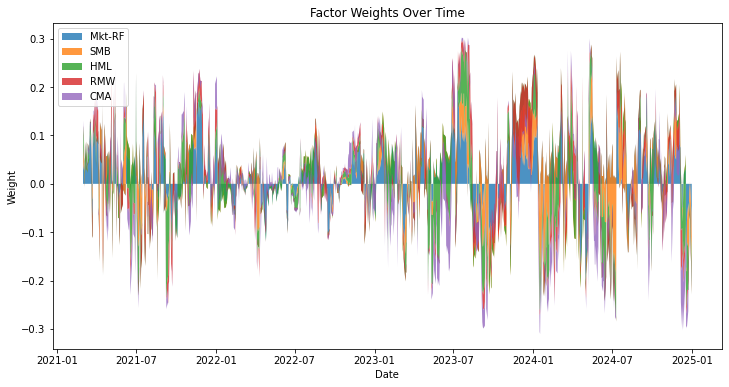

In [192]:
# Plot strategy factor weights over time as a stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(weights_df.index, weights_df.T, labels=weights_df.columns, alpha=0.8)
plt.legend(loc="upper left")
plt.title("Factor Weights Over Time")
plt.ylabel("Weight")
plt.xlabel("Date")
plt.show()

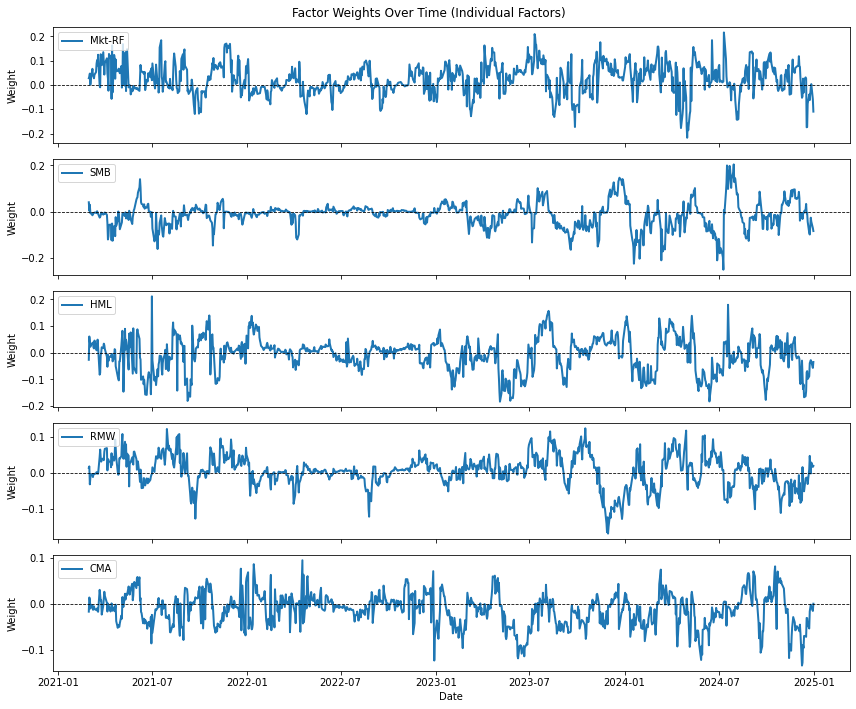

In [193]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 10), sharex=True)

for i, factor in enumerate(weights_df.columns):
    axes[i].plot(weights_df.index, weights_df[factor], label=factor, linewidth=2)
    axes[i].set_ylabel("Weight")
    axes[i].legend(loc="upper left")
    axes[i].axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Reference line at zero

# Set x-axis label and overall title
axes[-1].set_xlabel("Date")
plt.suptitle("Factor Weights Over Time (Individual Factors)")
plt.tight_layout()
plt.show()

## Vix Risk Adjustment

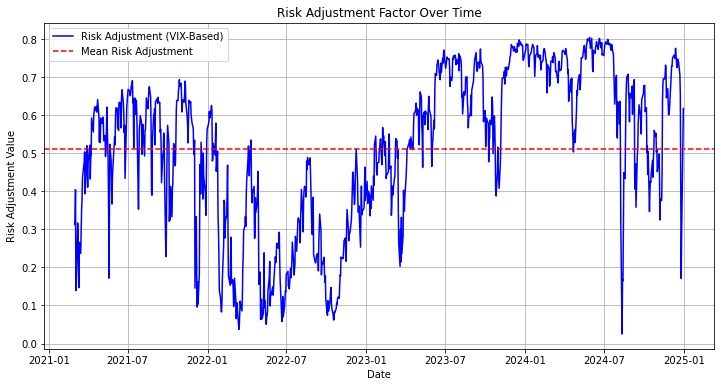

In [195]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_df.index, test_df["Risk Adjustment"], label="Risk Adjustment (VIX-Based)", color="blue")
plt.axhline(y=test_df["Risk Adjustment"].mean(), linestyle="--", color="red", label="Mean Risk Adjustment")
plt.title("Risk Adjustment Factor Over Time")
plt.xlabel("Date")
plt.ylabel("Risk Adjustment Value")
plt.legend()
plt.grid(True)
plt.show()


## Gross and Net Exposure

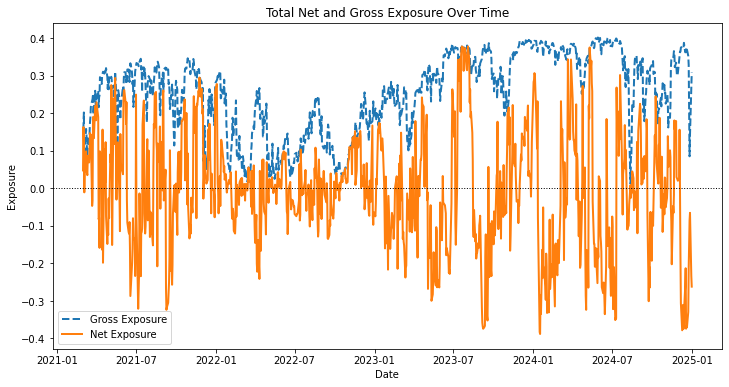

In [196]:
import matplotlib.pyplot as plt

# Compute gross exposure (sum of absolute weights) and net exposure (sum of raw weights)
test_df["Gross Exposure"] = weights_df.abs().sum(axis=1)
test_df["Net Exposure"] = weights_df.sum(axis=1)

# Plot net and gross exposure over time
plt.figure(figsize=(12, 6))
plt.plot(test_df.index, test_df["Gross Exposure"], label="Gross Exposure", linestyle="--", linewidth=2)
plt.plot(test_df.index, test_df["Net Exposure"], label="Net Exposure", linewidth=2)
plt.axhline(y=0, color='black', linestyle='dotted', linewidth=1)  # Reference line at 0
plt.title("Total Net and Gross Exposure Over Time")
plt.ylabel("Exposure")
plt.xlabel("Date")
plt.legend()
plt.show()


## Feature importance for each factor

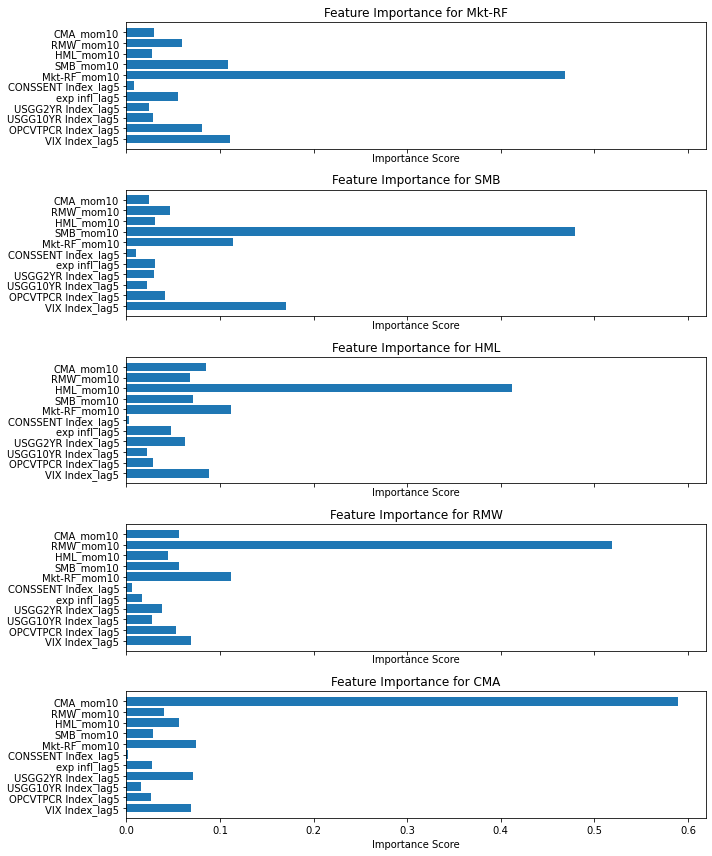

,Mkt-RF,SMB,HML,RMW,CMA
VIX Index_lag5,0.110556,0.170795,0.088325,0.068643,0.068979
OPCVTPCR Index_lag5,0.080929,0.040865,0.028623,0.053575,0.026334
USGG10YR Index_lag5,0.028497,0.022365,0.021597,0.027561,0.015702
USGG2YR Index_lag5,0.023771,0.029965,0.062276,0.038581,0.070878
exp infl_lag5,0.054838,0.031049,0.047697,0.017242,0.027029
CONSSENT Index_lag5,0.007898,0.010562,0.002674,0.006414,0.002254
Mkt-RF_mom10,0.469047,0.114110,0.112111,0.112222,0.074753
SMB_mom10,0.108163,0.479474,0.071546,0.056116,0.028260
HML_mom10,0.027937,0.030158,0.412336,0.044212,0.056398
RMW_mom10,0.059203,0.046301,0.068073,0.519301,0.040021


In [198]:
# Re-run the ML-based trading strategy after execution state reset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "BBGData/trading_strategy_all_data.csv"
df = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")

# Compute the equal-weighted 5-factor benchmark return
df["Benchmark Return"] = ((df["Mkt-RF"] + df["SMB"] + df["HML"] + df["RMW"] + df["CMA"]) / 5) / 100  # Convert from percent

# Compute cumulative returns for the benchmark
df["Benchmark Cumulative"] = (1 + df["Benchmark Return"]).cumprod()

# Compute cumulative returns for the market factor only
df["Market Cumulative"] = (1 + (df["Mkt-RF"] / 100)).cumprod()

# Define lag selection for macroeconomic variables
macro_vars = ["VIX Index", "OPCVTPCR Index", "USGG10YR Index", "USGG2YR Index", "exp infl", "CONSSENT Index"]
for var in macro_vars:
    df[f"{var}_lag5"] = df[var].shift(5)

# Factor momentum - 10-day rolling average return
factors = ["Mkt-RF", "SMB", "HML", "RMW", "CMA"]
for factor in factors:
    df[f"{factor}_mom10"] = df[factor].rolling(window=10).mean()

# Drop NaNs caused by lagging
df.dropna(inplace=True)

# Split into training and testing sets
split_index = int(len(df) * 0.8)
train_df = df.iloc[:split_index].copy()
test_df = df.iloc[split_index:].copy()

# Feature selection
features = [f"{var}_lag5" for var in macro_vars] + [f"{factor}_mom10" for factor in factors]
target_factors = factors  # Predicting factor returns

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(train_df[features])
X_test = scaler.transform(test_df[features])

# Train ML models for each factor
models = {}
for factor in target_factors:
    y_train = train_df[factor] / 100  # Convert to decimal
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    models[factor] = model

# Extract feature importances for each factor model
importances_dict = {factor: models[factor].feature_importances_ for factor in target_factors}

# Convert to DataFrame for visualization
importances_df = pd.DataFrame(importances_dict, index=features)

# Plot feature importance for each factor
fig, axes = plt.subplots(len(target_factors), 1, figsize=(10, 12), sharex=True)

for i, factor in enumerate(target_factors):
    axes[i].barh(importances_df.index, importances_df[factor])
    axes[i].set_title(f"Feature Importance for {factor}")
    axes[i].set_xlabel("Importance Score")

plt.tight_layout()
plt.show()

# Display numerical values of feature importance
importances_df
